In [1]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from imblearn.metrics import geometric_mean_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, roc_curve
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import pandas as pd

In [2]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.1):

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('lightgreen', 'red', 'blue', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = np.argmax(classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T),axis=1)
    Z = Z.reshape(xx1.shape)
    fig, ax = plt.subplots(figsize=(20,20))
    ax.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    if test_idx:
    
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        ax.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

In [8]:
colors = ('lightgreen', 'red', 'blue', 'gray', 'cyan')
markers = ('s', 'x', 'o', '^', 'v')

# Set1

In [9]:
pope_count = 128
kiddo_count = 256
police_count = 32
popes_x = np.random.normal(2, 2, pope_count)*5 + 5
popes_y = np.random.normal(5, 0.4, pope_count)*3 + 10
popes = np.concatenate((popes_x.reshape(-1,1),popes_y.reshape(-1,1)),axis=1)
kiddos = np.random.normal(5, 0.7, 2*kiddo_count)*5
polices = np.random.normal(5, 3, 2*police_count)+10

In [10]:
p = np.ones(pope_count).reshape(-1,1)-1
k = np.ones(kiddo_count).reshape(-1,1)
pol = np.ones(police_count).reshape(-1,1)+1

popes = np.concatenate((popes,p),axis=1)
kiddos = np.concatenate((kiddos.reshape(-1,2),k),axis=1)
polices = np.concatenate((polices.reshape(-1,2),pol),axis=1)

set1 = np.concatenate((popes,kiddos,polices))

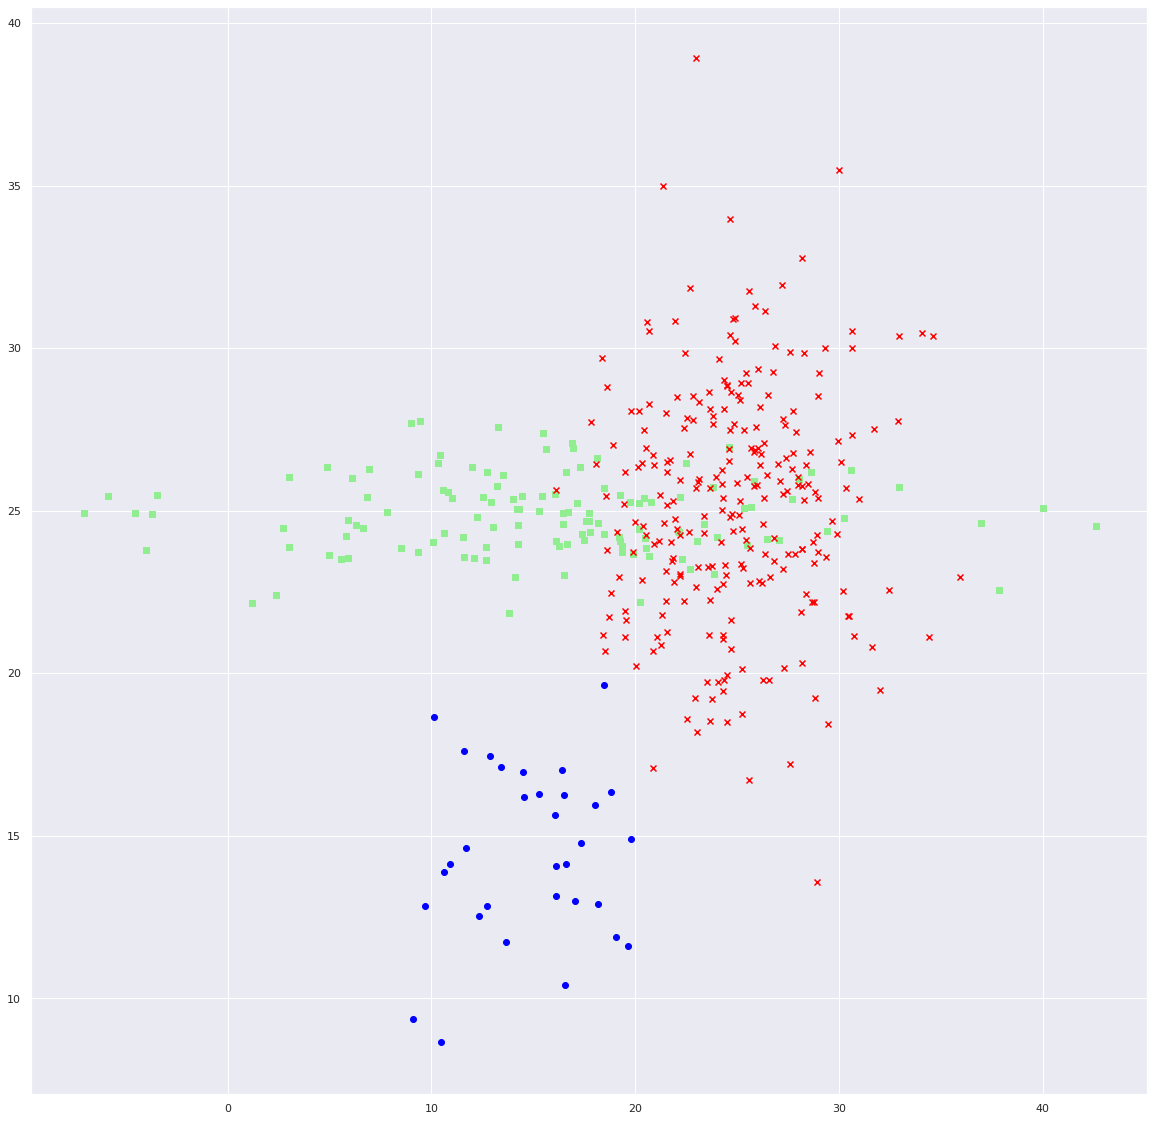

In [11]:
fig, ax = plt.subplots(figsize=(20,20))
for (x,y,c) in set1:
    c=int(c)
    ax.scatter(x,y,c=colors[c],marker=markers[c])

In [12]:
set1_acc = []
X = set1[:,:2]
y = set1[:,2]
Y = label_binarize(y, classes=[0,1,2])
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)

#    k-NN z k=1, głosowaniem większościowym i metryką Euklidesa;

In [13]:
knn_s1_1 = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn_s1_1.fit(X_train, y_train)
acc = knn_s1_1.score(X_test,y_test)
set1_acc += [acc]
print(f'Accuracy: {acc}')

Accuracy: 0.8076923076923077


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


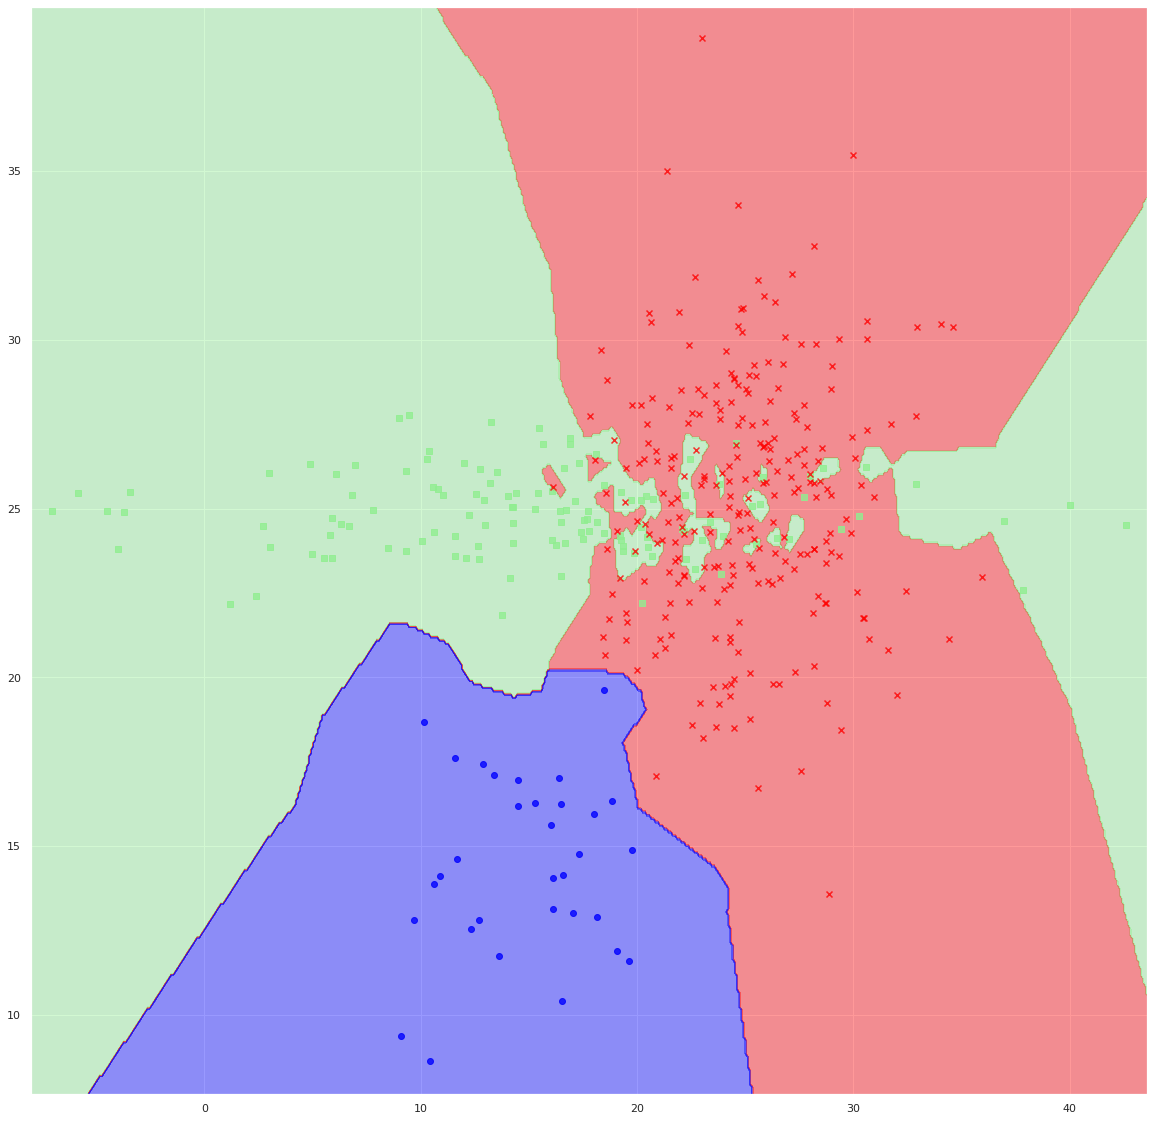

In [14]:
plot_decision_regions(X,y,classifier=knn_s1_1)

#    k-NN z k=7, głosowaniem większościowym i metryką Euklidesa;

In [15]:
knn_s1_2 = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn_s1_2.fit(X_train, y_train)
acc = knn_s1_2.score(X_test,y_test)
set1_acc += [acc]
print(f'Accuracy: {acc}')

Accuracy: 0.875


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


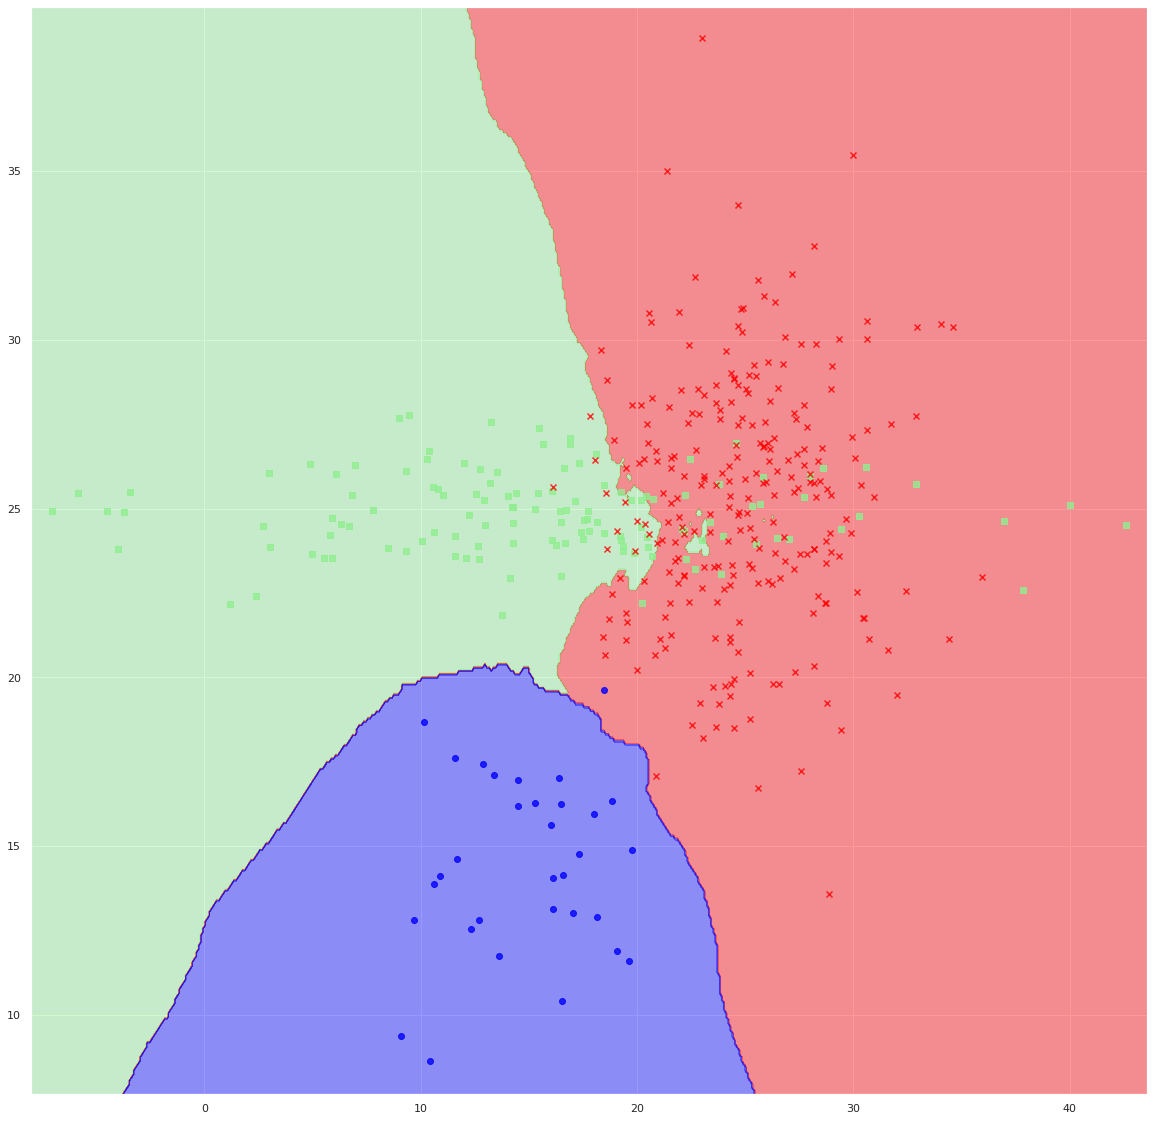

In [16]:
plot_decision_regions(X,y,classifier=knn_s1_2)

#    k-NN z k=7, głosowaniem ważonym odległością i metryką Euklidesa;

In [17]:
knn_s1_3 = KNeighborsClassifier(n_neighbors=7,weights='distance', metric='euclidean')
knn_s1_3.fit(X_train, y_train)
acc = knn_s1_3.score(X_test,y_test)
set1_acc += [acc]
print(f'Accuracy: {acc}')

Accuracy: 0.875


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


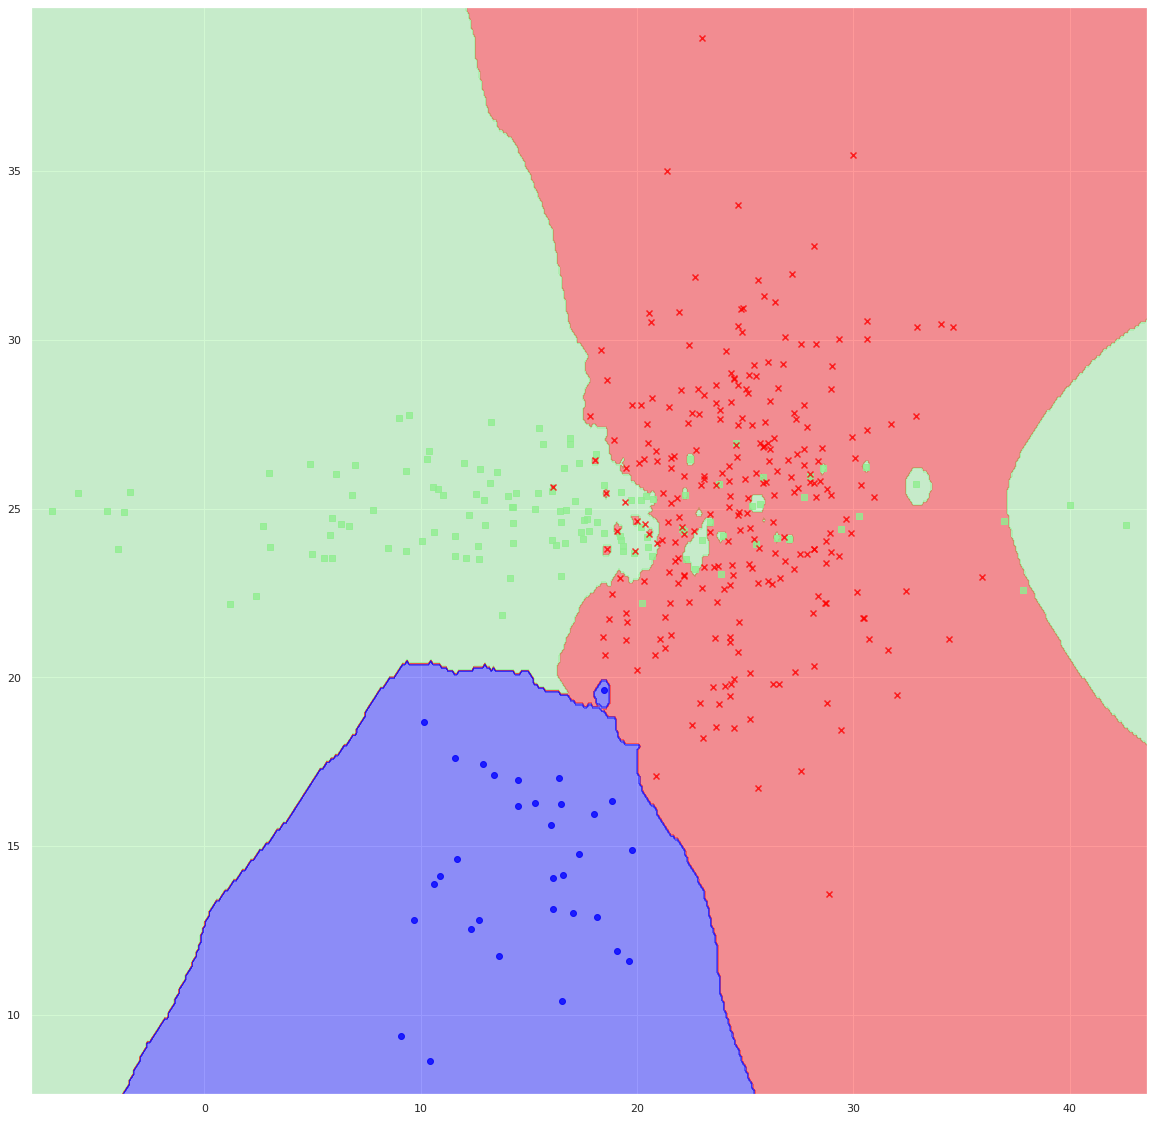

In [18]:
plot_decision_regions(X,y,classifier=knn_s1_3)

#    k-NN z k=1, głosowaniem większościowym i metryką Mahalanobisa;

In [19]:
knn_s1_4 = KNeighborsClassifier(n_neighbors=1, metric='mahalanobis',metric_params={'V': np.cov(X,rowvar=False)})
knn_s1_4.fit(X_train, y_train)
acc = knn_s1_4.score(X_test,y_test)
set1_acc += [acc]
print(f'Accuracy: {acc}')

Accuracy: 0.8269230769230769


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


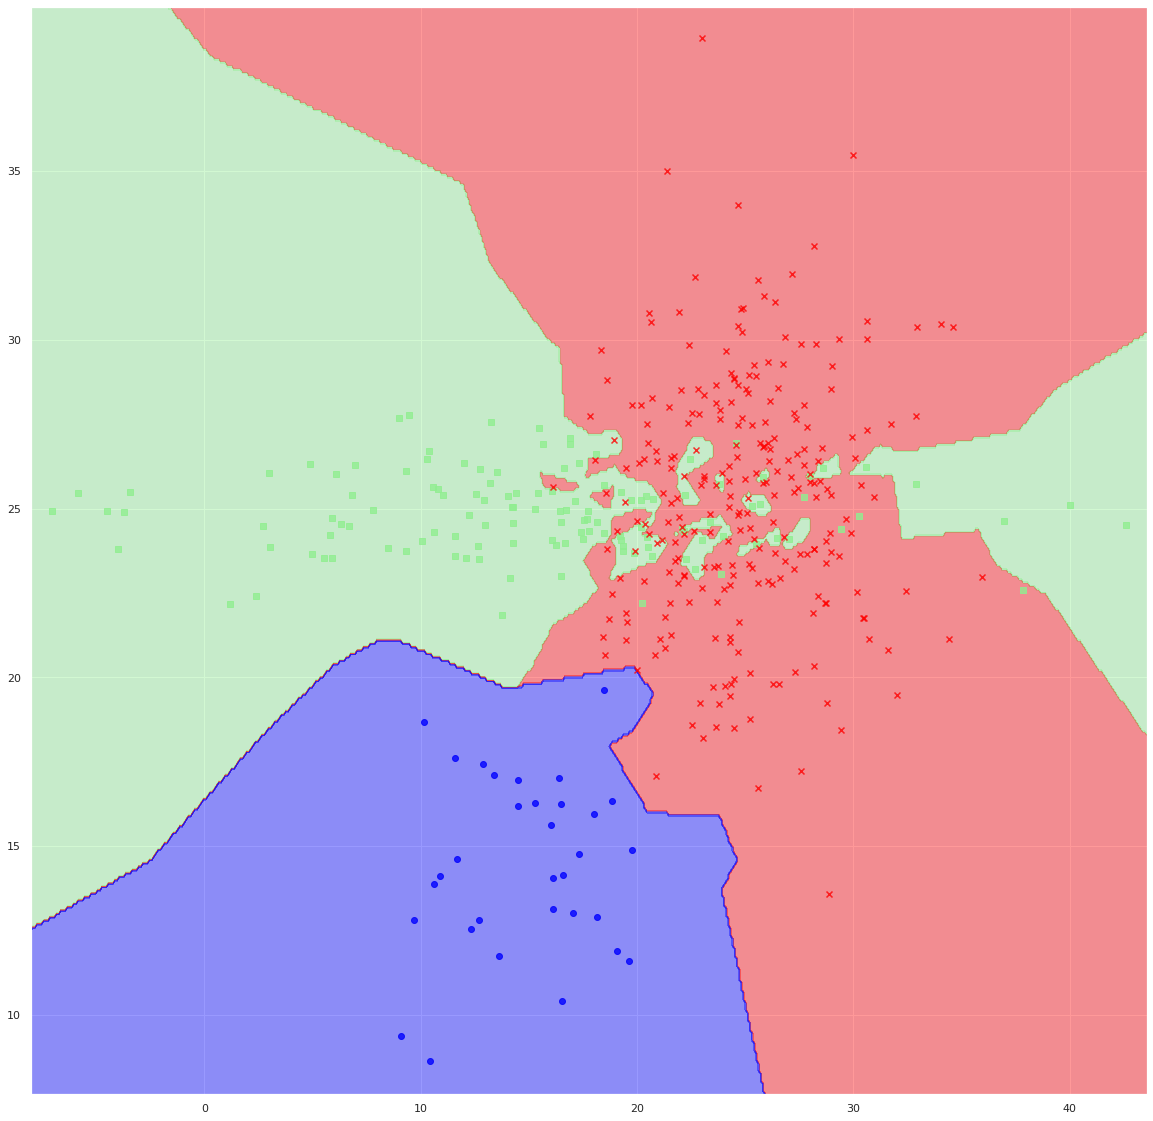

In [20]:
plot_decision_regions(X,y,classifier=knn_s1_4)

#    k-NN z k=7, głosowaniem ważonym odległością i metryką Mahalanobisa. 

In [21]:
knn_s1_5 = KNeighborsClassifier(n_neighbors=7,weights='distance', metric='mahalanobis',metric_params={'V': np.cov(X,rowvar=False)})
knn_s1_5.fit(X_train, y_train)
acc = knn_s1_5.score(X_test,y_test)
set1_acc += [acc]
print(f'Accuracy: {acc}')

Accuracy: 0.875


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


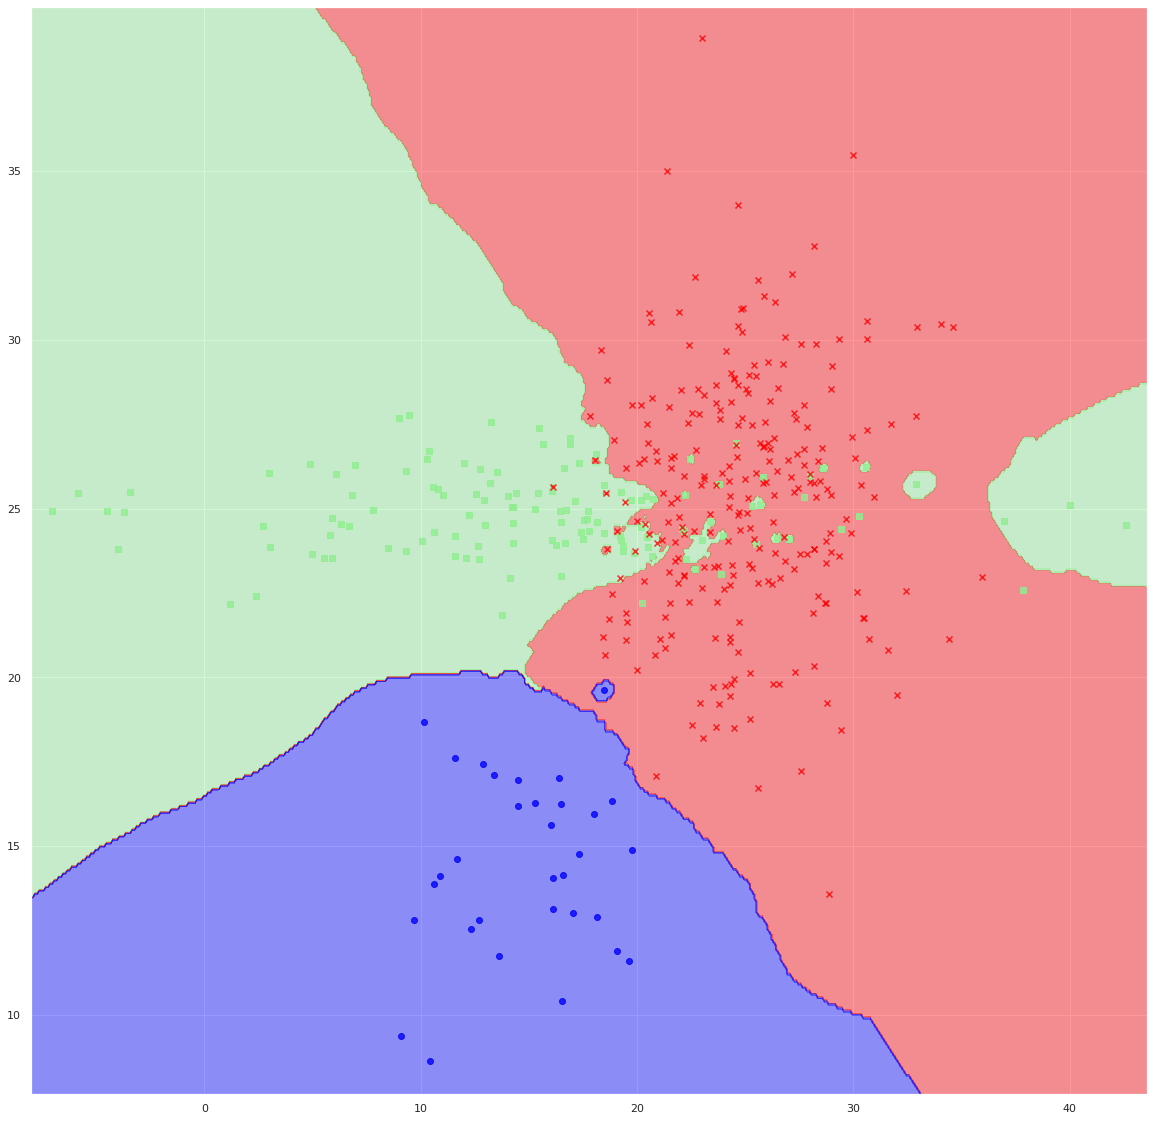

In [22]:
plot_decision_regions(X,y,classifier=knn_s1_5)

# Set2

In [23]:
pope_count = 256
kiddo_count = 256
police_count = 128

popes_x = np.random.normal(0, 4, pope_count)*2
popes_y = np.random.normal(0, 3, pope_count)*2
popes = np.concatenate((popes_x.reshape(-1,1),popes_y.reshape(-1,1)),axis=1)

kiddos_x = np.random.normal(7, 4, kiddo_count)*2
kiddos_y = np.random.normal(7, 3, kiddo_count)*2
kiddos = np.concatenate((kiddos_x.reshape(-1,1),kiddos_y.reshape(-1,1)),axis=1)

polices_x = np.random.normal(14, 4, police_count)*2
polices_y = np.random.normal(14, 3, police_count)*2
polices = np.concatenate((polices_x.reshape(-1,1),polices_y.reshape(-1,1)),axis=1)

In [24]:
p = np.ones(pope_count).reshape(-1,1)-1
k = np.ones(kiddo_count).reshape(-1,1)
pol = np.ones(police_count).reshape(-1,1)+1

popes = np.concatenate((popes,p),axis=1)
kiddos = np.concatenate((kiddos,k),axis=1)
polices = np.concatenate((polices,pol),axis=1)

set2 = np.concatenate((popes,kiddos,polices))

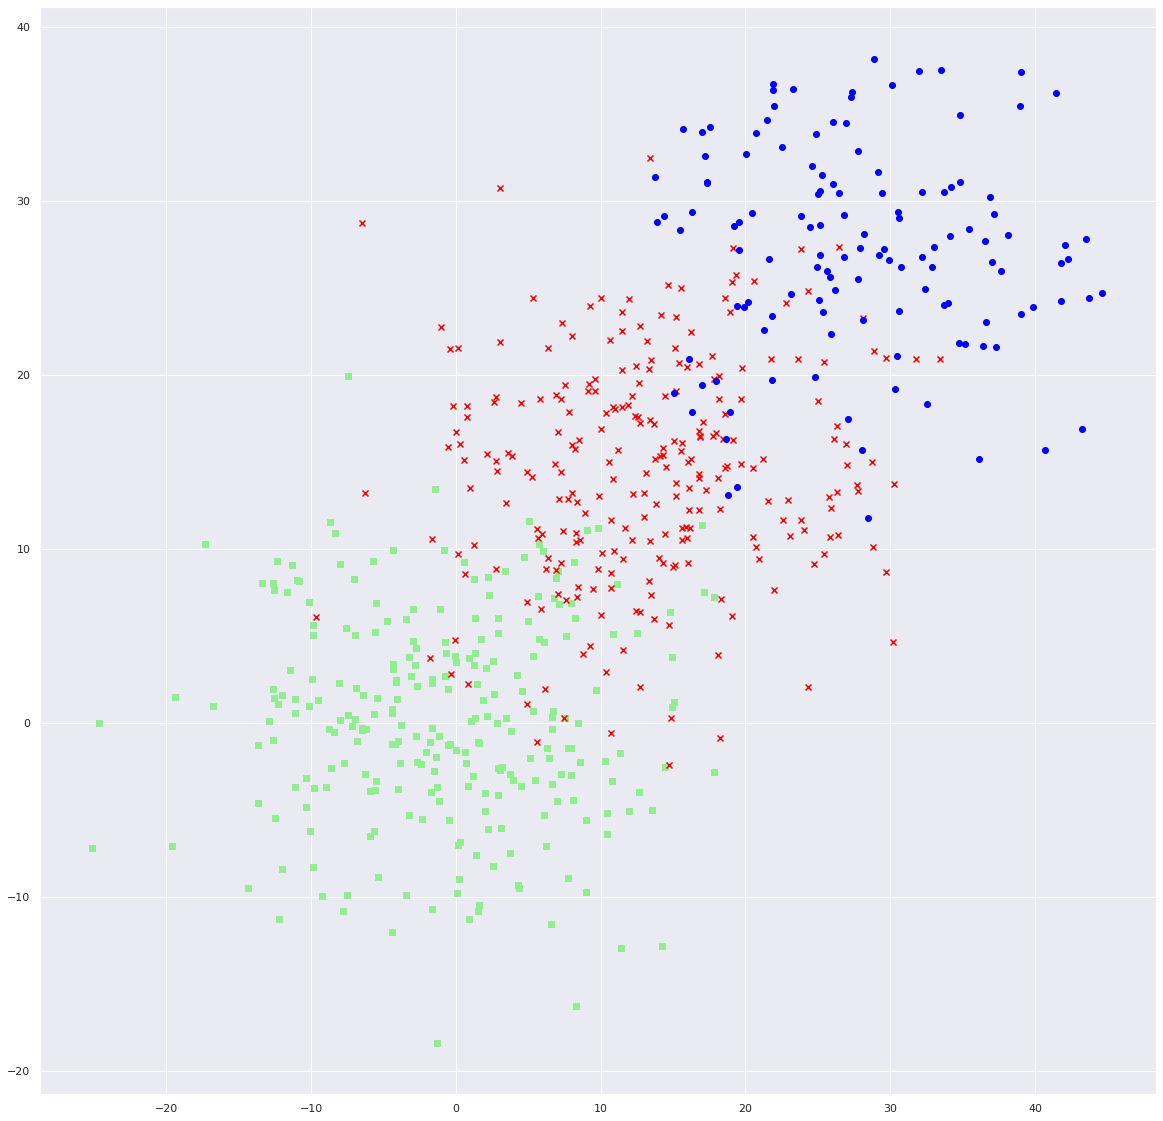

In [25]:
fig, ax = plt.subplots(figsize=(20,20))
for (x,y,c) in set2:
    c=int(c)
    ax.scatter(x,y,c=colors[c],marker=markers[c])

In [26]:
set2_acc = []
X = set2[:,:2]
y = set2[:,2]
Y = label_binarize(y, classes=[0,1,2])
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)

#    k-NN z k=1, głosowaniem większościowym i metryką Euklidesa;

In [27]:
knn_s2_1 = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn_s2_1.fit(X_train, y_train)
acc = knn_s2_1.score(X_test,y_test)
set2_acc += [acc]
print(f'Accuracy: {acc}')

Accuracy: 0.79375


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


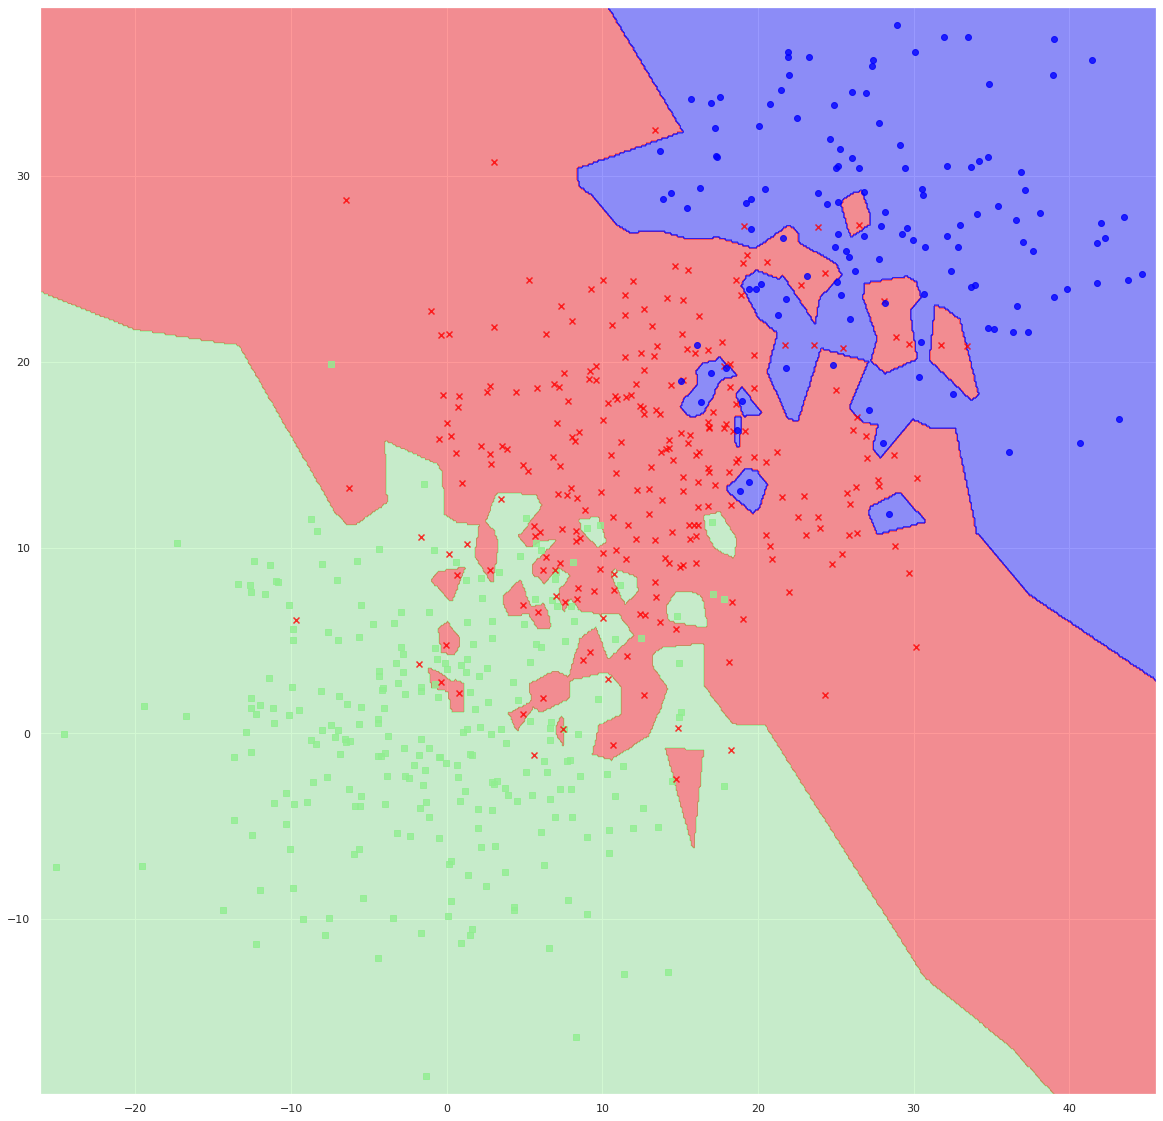

In [28]:
plot_decision_regions(X,y,classifier=knn_s2_1)

#    k-NN z k=7, głosowaniem większościowym i metryką Euklidesa;

In [29]:
knn_s2_2 = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn_s2_2.fit(X_train, y_train)
acc = knn_s2_2.score(X_test,y_test)
set2_acc += [acc]
print(f'Accuracy: {acc}')

Accuracy: 0.80625


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


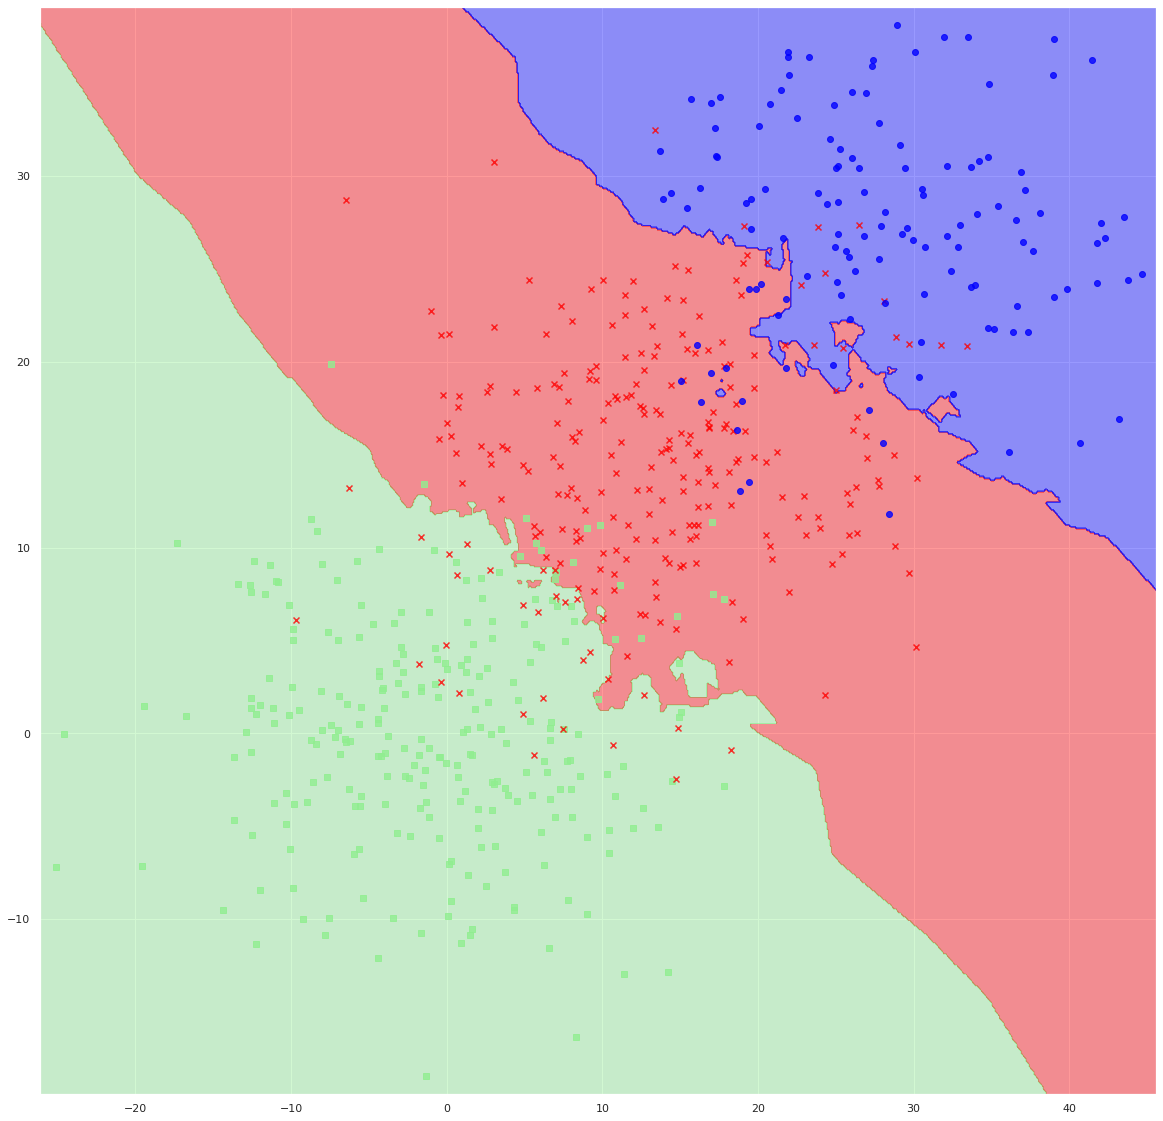

In [30]:
plot_decision_regions(X,y,classifier=knn_s2_2)

#    k-NN z k=7, głosowaniem ważonym odległością i metryką Euklidesa;

In [31]:
knn_s2_3 = KNeighborsClassifier(n_neighbors=7,weights='distance', metric='euclidean')
knn_s2_3.fit(X_train, y_train)
acc = knn_s2_3.score(X_test,y_test)
set2_acc += [acc]
print(f'Accuracy: {acc}')

Accuracy: 0.80625


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


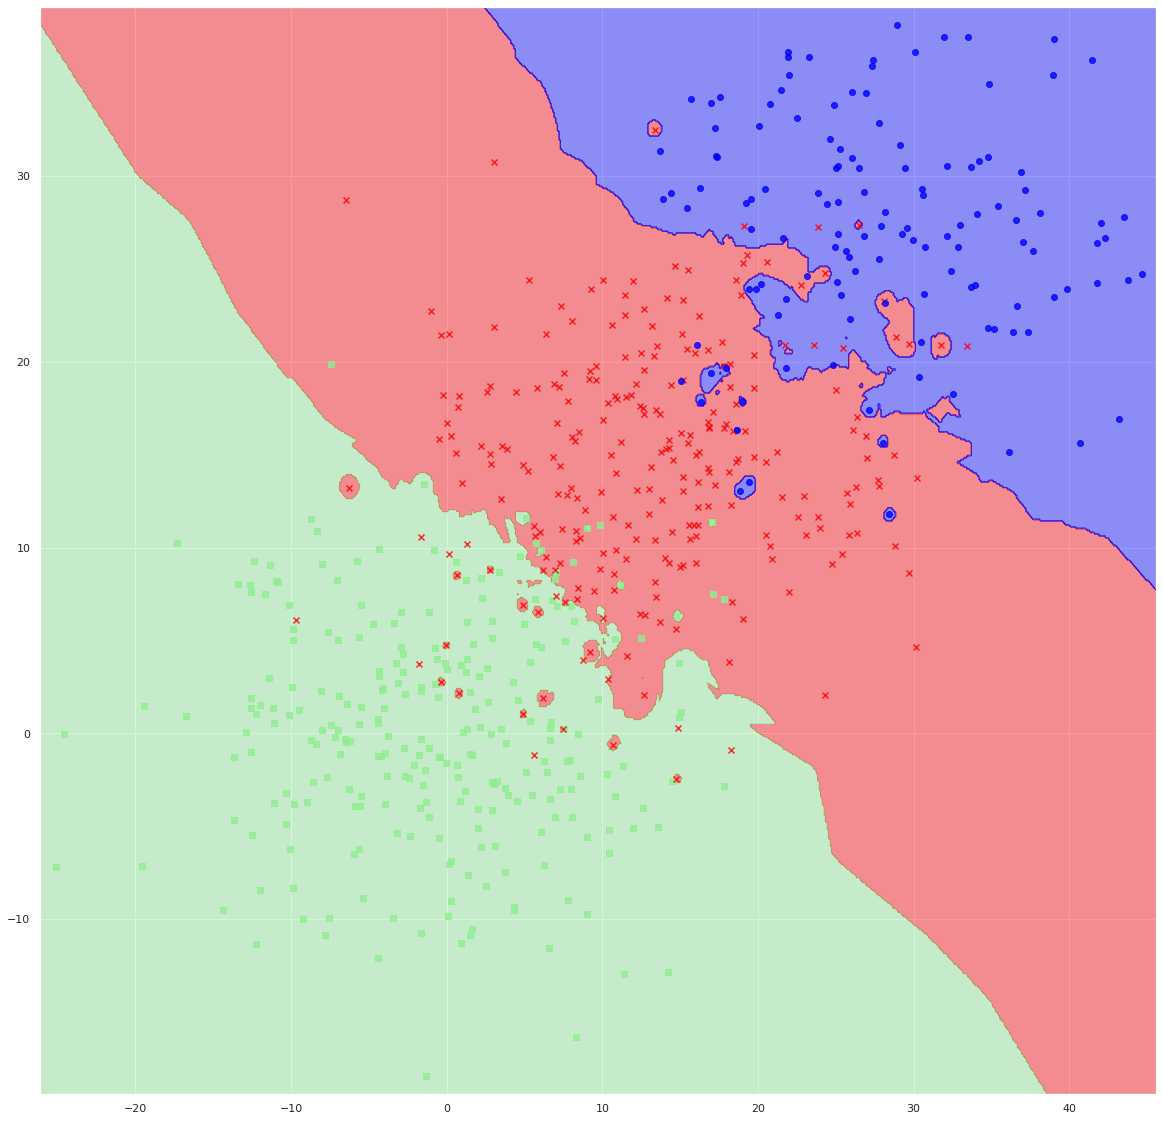

In [32]:
plot_decision_regions(X,y,classifier=knn_s2_3)

#    k-NN z k=1, głosowaniem większościowym i metryką Mahalanobisa;

In [33]:
knn_s2_4 = KNeighborsClassifier(n_neighbors=1, metric='mahalanobis',metric_params={'V': np.cov(X,rowvar=False)})
knn_s2_4.fit(X_train, y_train)
acc = knn_s2_4.score(X_test,y_test)
set2_acc += [acc]
print(f'Accuracy: {acc}')

Accuracy: 0.7875


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


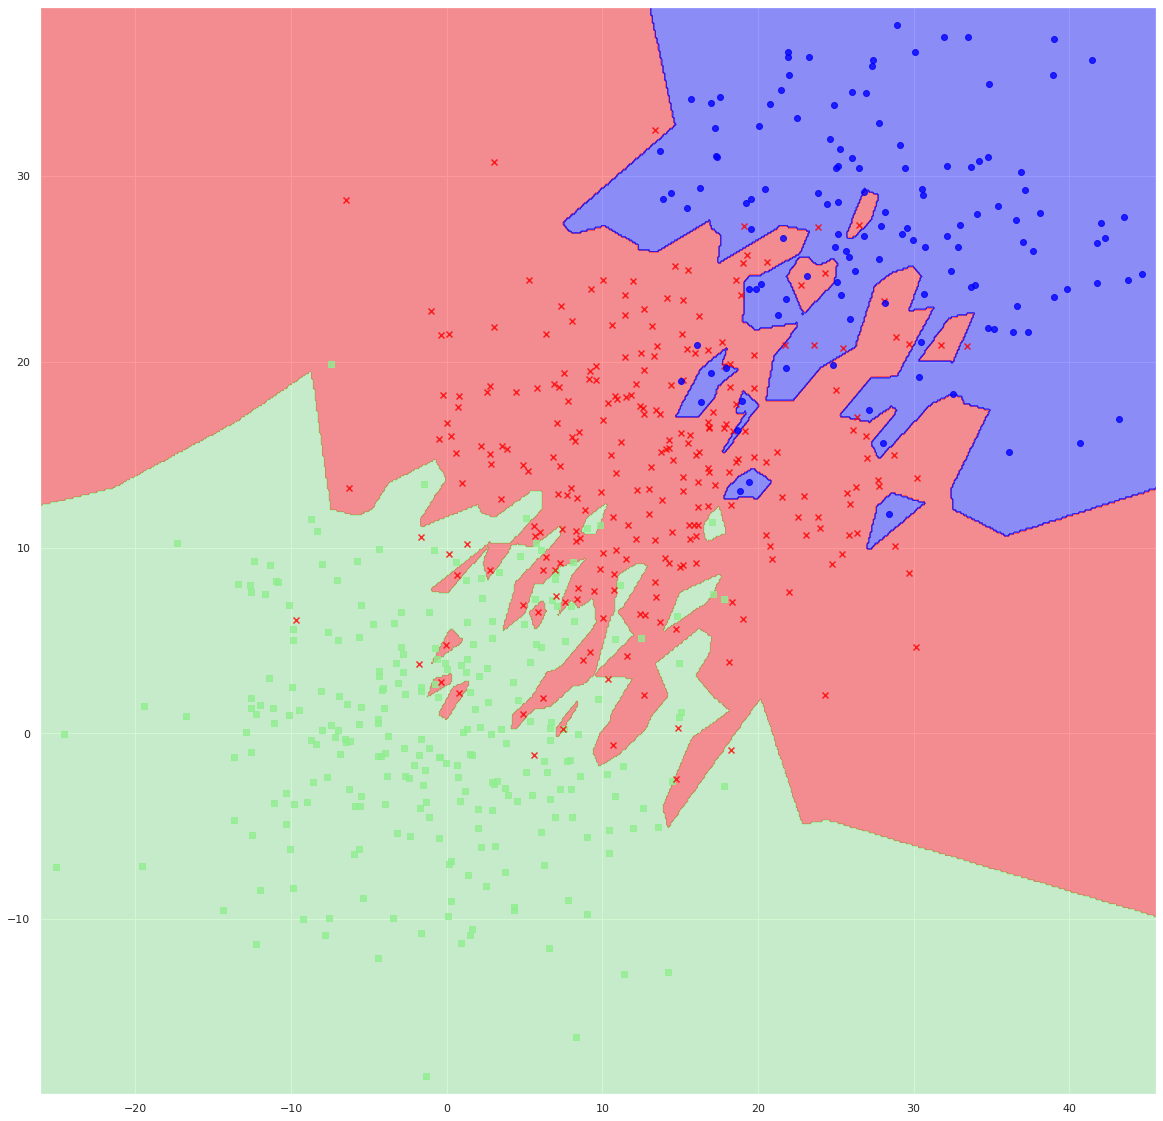

In [34]:
plot_decision_regions(X,y,classifier=knn_s2_4)

#    k-NN z k=7, głosowaniem ważonym odległością i metryką Mahalanobisa. 

In [35]:
knn_s2_5 = KNeighborsClassifier(n_neighbors=7,weights='distance', metric='mahalanobis',metric_params={'V': np.cov(X,rowvar=False)})
knn_s2_5.fit(X_train, y_train)
acc = knn_s2_5.score(X_test,y_test)
set2_acc += [acc]
print(f'Accuracy: {acc}')

Accuracy: 0.8125


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


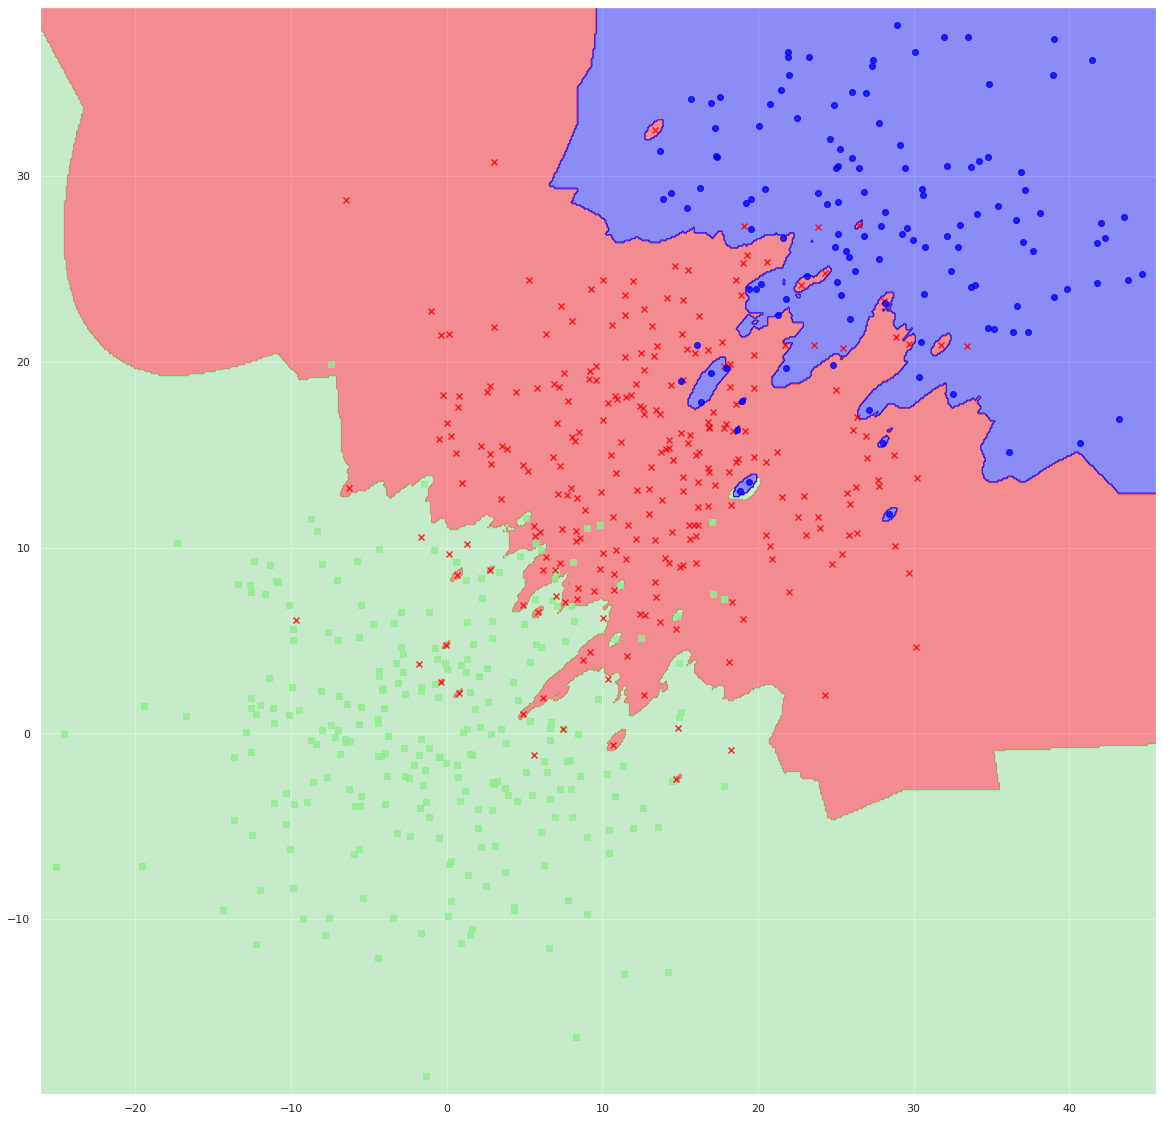

In [36]:
plot_decision_regions(X,y,classifier=knn_s2_5)

# Set3

In [37]:
pope_count = 512
kiddo_count = 128
police_count = 64

d = np.random.random(pope_count)*2*np.pi
popes_x = np.random.normal(10, 2, pope_count) + np.cos(d)*5
popes_y = np.random.normal(10, 2, pope_count) + np.sin(d)*5
popes = np.concatenate((popes_x.reshape(-1,1),popes_y.reshape(-1,1)),axis=1)

kiddos_x = np.random.normal(10, 1, kiddo_count)
kiddos_y = np.random.normal(10, 1, kiddo_count)
kiddos = np.concatenate((kiddos_x.reshape(-1,1),kiddos_y.reshape(-1,1)),axis=1)

polices_x = np.random.normal(5, 2, police_count)
polices_y = np.random.normal(5, 2, police_count)
polices = np.concatenate((polices_x.reshape(-1,1),polices_y.reshape(-1,1)),axis=1)

In [38]:
p = np.ones(pope_count).reshape(-1,1)-1
k = np.ones(kiddo_count).reshape(-1,1)
pol = np.ones(police_count).reshape(-1,1)+1

popes = np.concatenate((popes,p),axis=1)
kiddos = np.concatenate((kiddos,k),axis=1)
polices = np.concatenate((polices,pol),axis=1)

set3 = np.concatenate((popes,kiddos,polices))

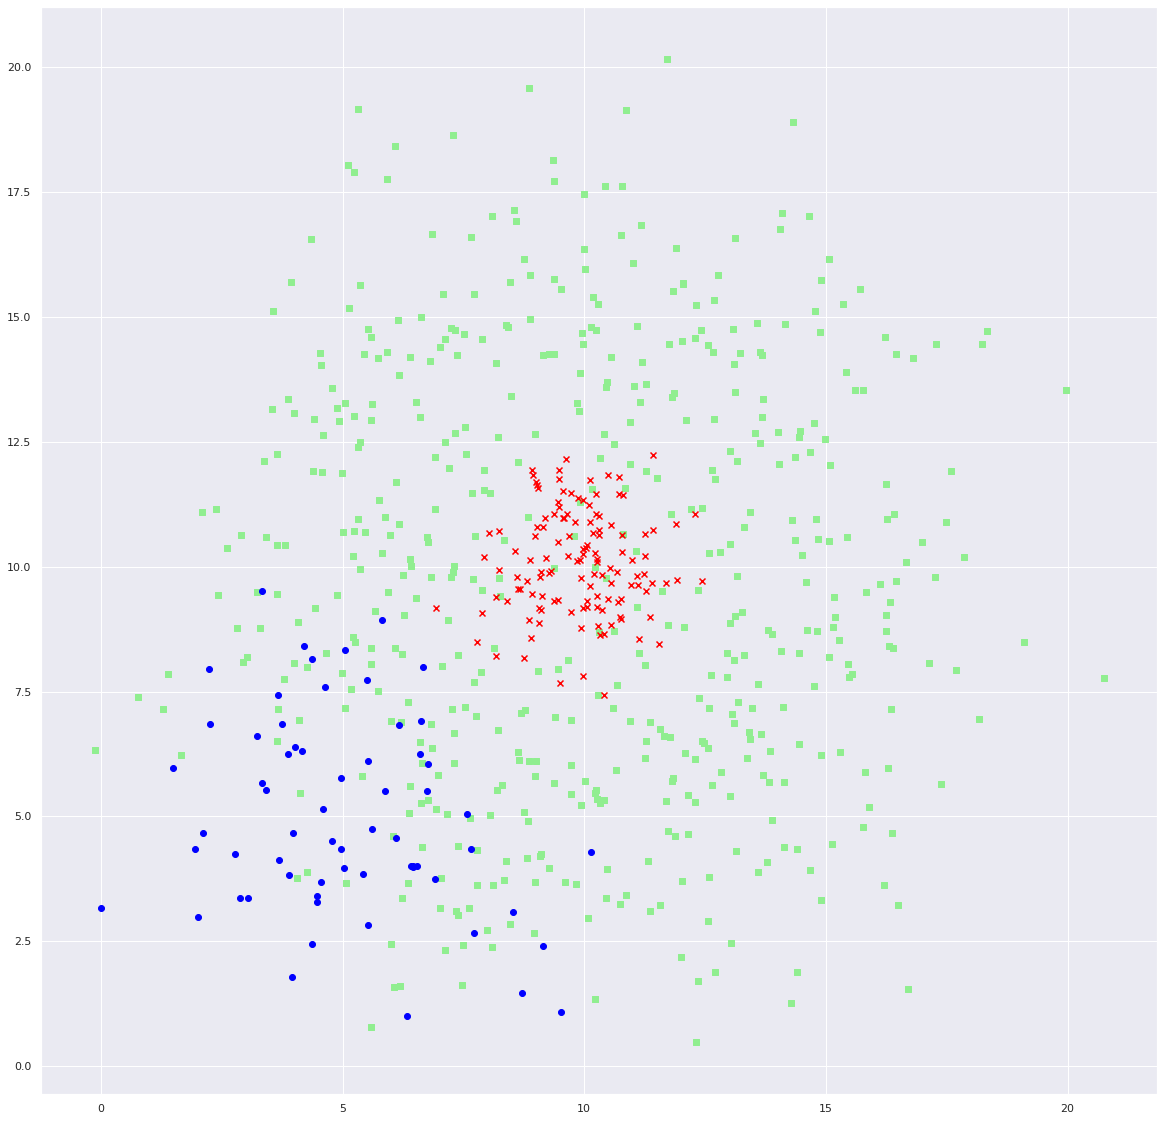

In [39]:
fig, ax = plt.subplots(figsize=(20,20))
for (x,y,c) in set3:
    c=int(c)
    ax.scatter(x,y,c=colors[c],marker=markers[c])

In [40]:
set3_acc = []
X = set3[:,:2]
y = set3[:,2]
Y = label_binarize(y, classes=[0,1,2])
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)

#    k-NN z k=1, głosowaniem większościowym i metryką Euklidesa;

In [41]:
knn_s3_1 = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn_s3_1.fit(X_train, y_train)
acc = knn_s3_1.score(X_test,y_test)
set3_acc += [acc]
print(f'Accuracy: {acc}')

Accuracy: 0.8181818181818182


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


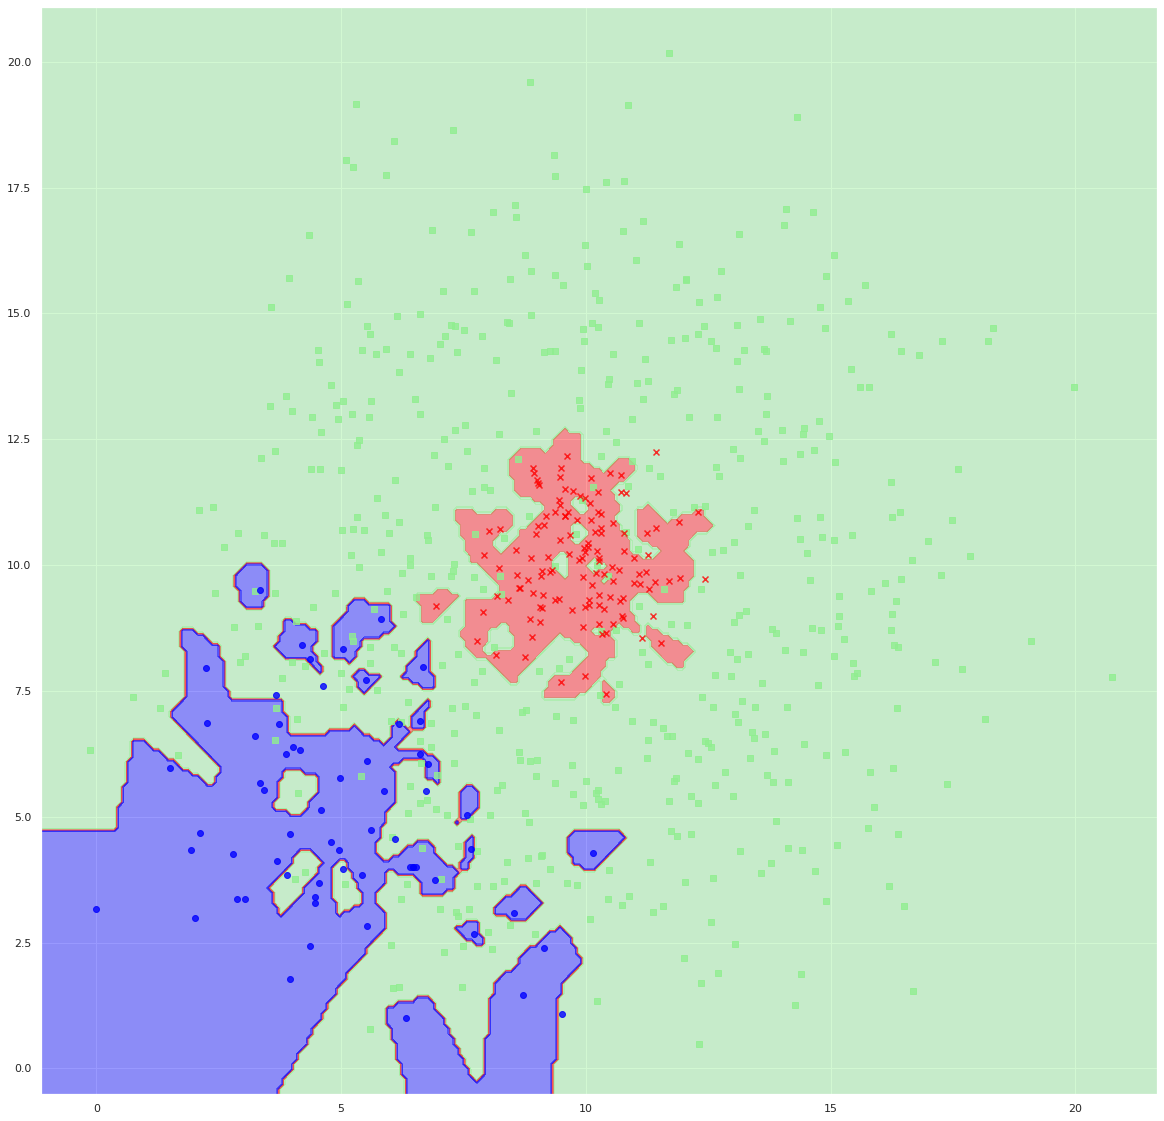

In [42]:
plot_decision_regions(X,y,classifier=knn_s3_1)

#    k-NN z k=7, głosowaniem większościowym i metryką Euklidesa;

In [43]:
knn_s3_2 = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn_s3_2.fit(X_train, y_train)
acc = knn_s3_2.score(X_test,y_test)
set3_acc += [acc]
print(f'Accuracy: {acc}')

Accuracy: 0.8977272727272727


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


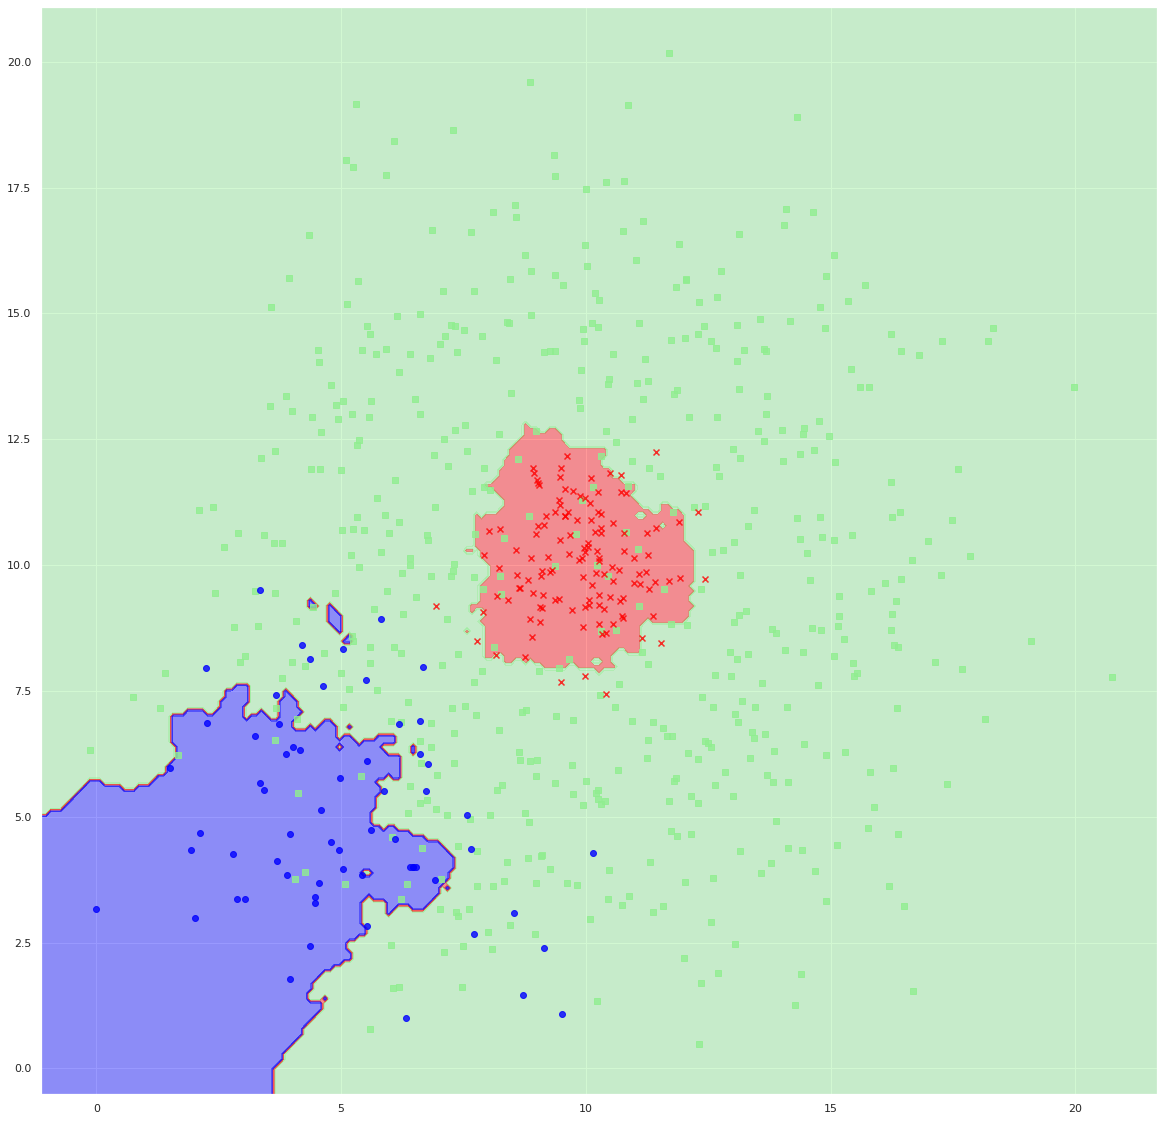

In [44]:
plot_decision_regions(X,y,classifier=knn_s3_2)

#    k-NN z k=7, głosowaniem ważonym odległością i metryką Euklidesa;

In [45]:
knn_s3_3 = KNeighborsClassifier(n_neighbors=7,weights='distance', metric='euclidean')
knn_s3_3.fit(X_train, y_train)
acc = knn_s3_3.score(X_test,y_test)
set3_acc += [acc]
print(f'Accuracy: {acc}')

Accuracy: 0.8693181818181818


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


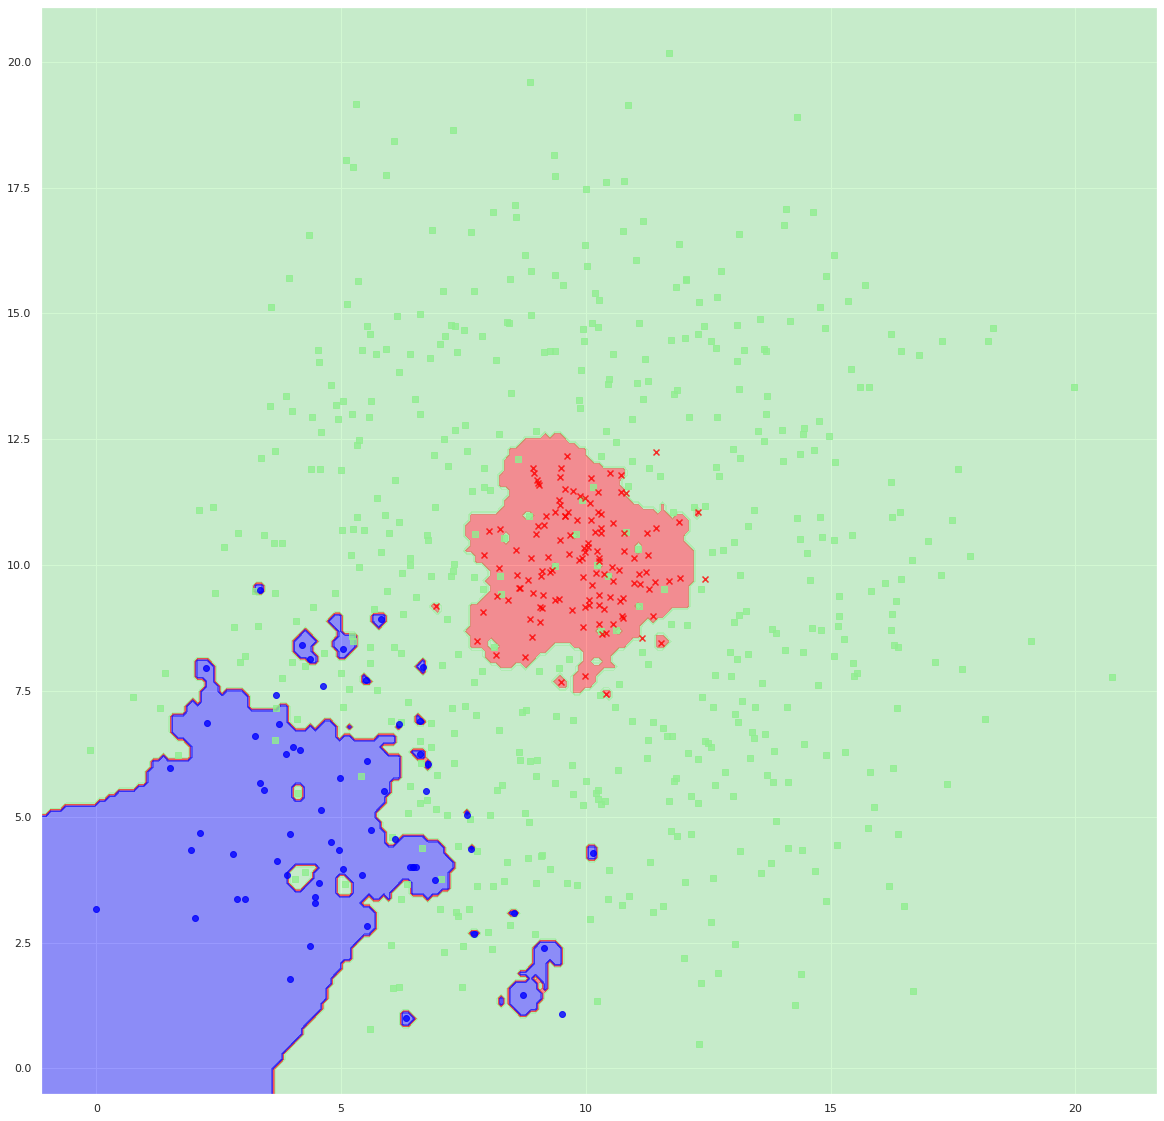

In [46]:
plot_decision_regions(X,y,classifier=knn_s3_3)

#    k-NN z k=1, głosowaniem większościowym i metryką Mahalanobisa;

In [47]:
knn_s3_4 = KNeighborsClassifier(n_neighbors=1, metric='mahalanobis',metric_params={'V': np.cov(X,rowvar=False)})
knn_s3_4.fit(X_train, y_train)
acc = knn_s3_4.score(X_test,y_test)
set3_acc += [acc]
print(f'Accuracy: {acc}')

Accuracy: 0.8181818181818182


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


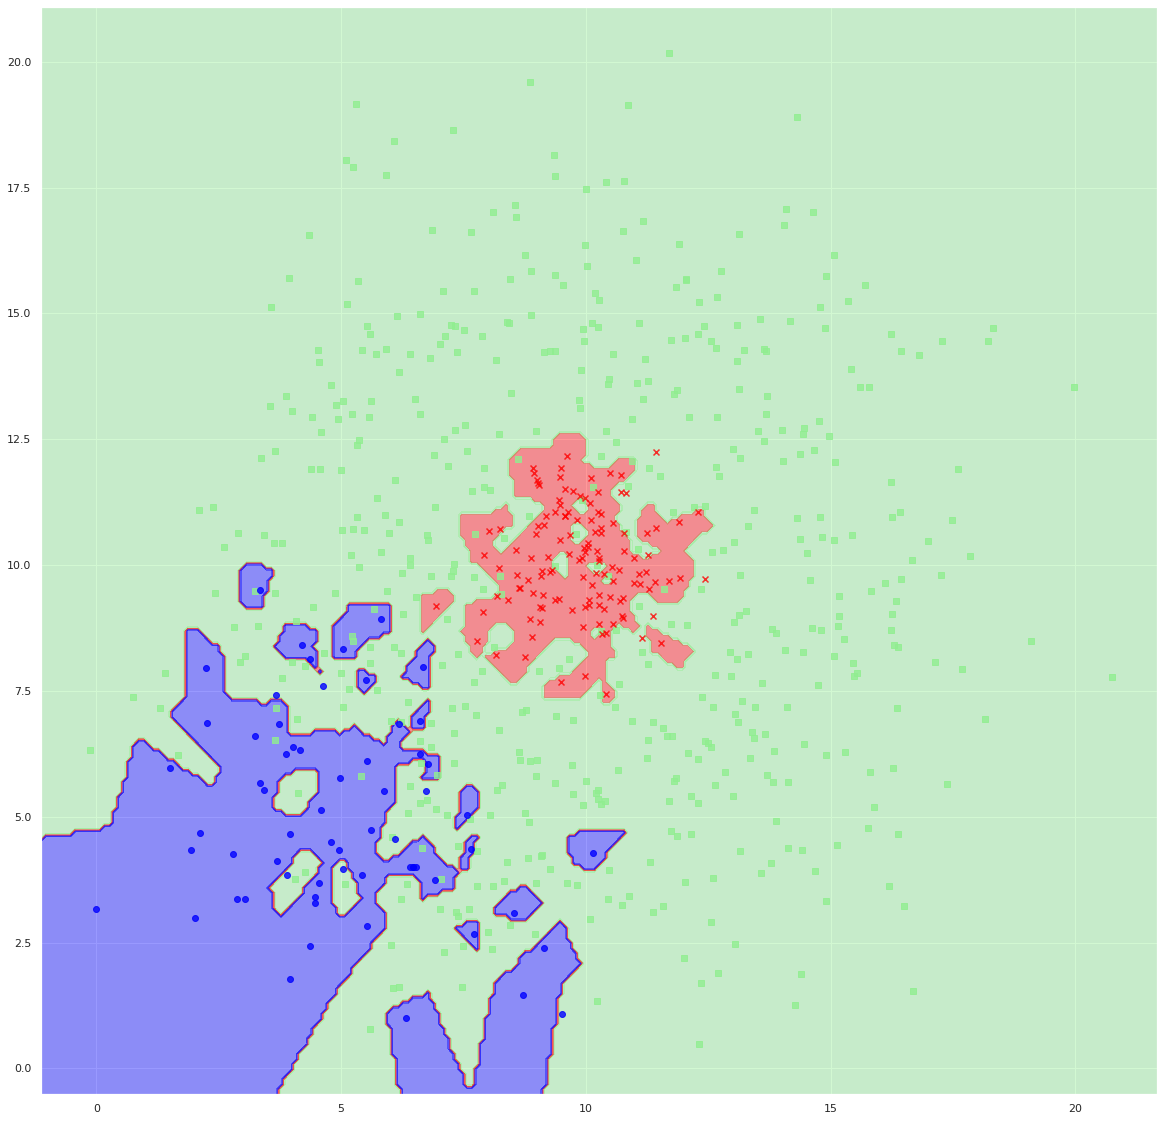

In [48]:
plot_decision_regions(X,y,classifier=knn_s3_4)

#    k-NN z k=7, głosowaniem ważonym odległością i metryką Mahalanobisa. 

In [49]:
knn_s3_5 = KNeighborsClassifier(n_neighbors=7,weights='distance', metric='mahalanobis',metric_params={'V': np.cov(X,rowvar=False)})
knn_s3_5.fit(X_train, y_train)
acc = knn_s3_5.score(X_test,y_test)
set3_acc += [acc]
print(f'Accuracy: {acc}')

Accuracy: 0.8636363636363636


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


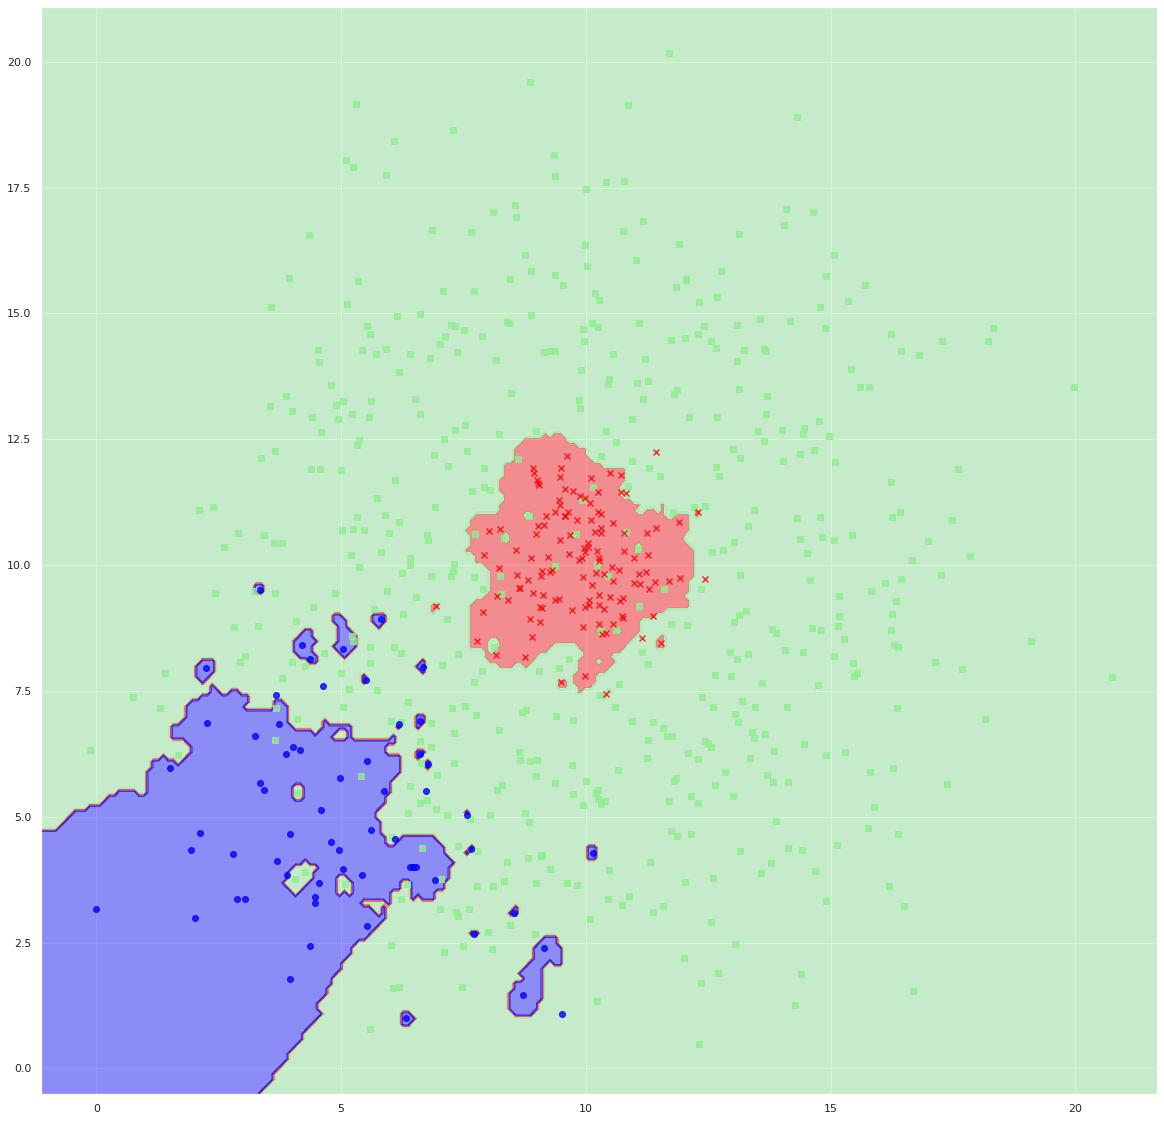

In [50]:
plot_decision_regions(X,y,classifier=knn_s3_5)

In [51]:
x_labels=('1-NN uniform Euklides',
'7-NN uniform Euklides',
'7-NN distance Euklides',
'1-NN uniform Mahalanobis',
'7-NN distance Mahalanobis')

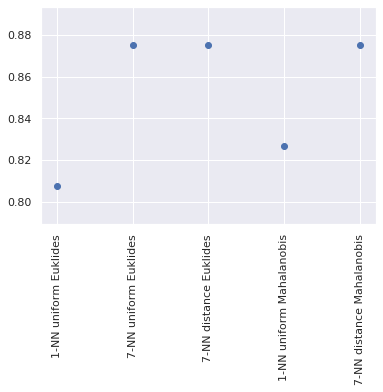

0.06730769230769229

In [52]:
plt.scatter(x_labels,set1_acc)
plt.xticks(x_labels, x_labels, rotation='vertical')
plt.show()
np.max(set1_acc) - np.min(set1_acc)

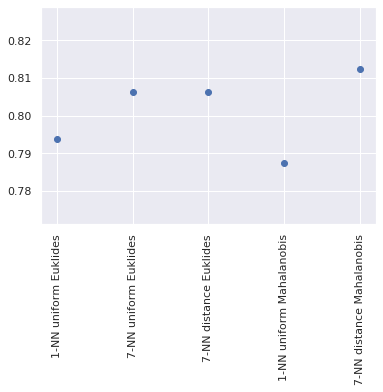

0.025000000000000022

In [53]:
plt.scatter(x_labels,set2_acc)
plt.xticks(x_labels, x_labels, rotation='vertical')
plt.show()
np.max(set2_acc) - np.min(set2_acc)

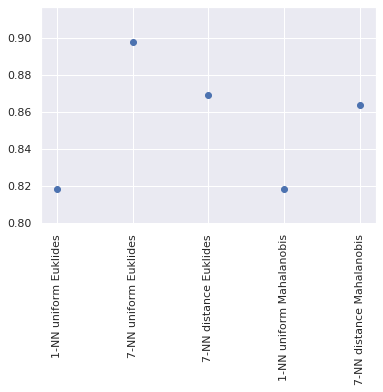

0.07954545454545447

In [54]:
plt.scatter(x_labels,set3_acc)
plt.xticks(x_labels, x_labels, rotation='vertical')
plt.show()
np.max(set3_acc) - np.min(set3_acc)

Zbiór 3 maił największe wachania dokładności
najgorszy wynik dla 1-NN uniform Mahalanobisa
najlepszy wink dla 7-NN uniform Euklides

# Najgorszy

In [101]:
y_pred=knn_s3_4.predict(X_test)
confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1))

array([[115,   7,  10],
       [  8,  23,   0],
       [  7,   0,   6]])

In [102]:
precision_score(y_test,y_pred,average='macro')

0.6754273504273504

In [103]:
recall_score(y_test,y_pred,average='micro')

0.8181818181818182

In [104]:
f1_score(y_test,y_pred,average='micro')

0.8181818181818182

In [105]:
geometric_mean_score(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1),average='weighted')

0.7735133436174856

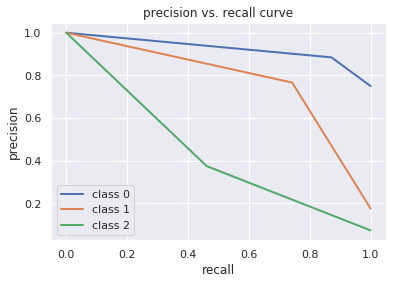

In [106]:
n_classes=3
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],y_pred[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

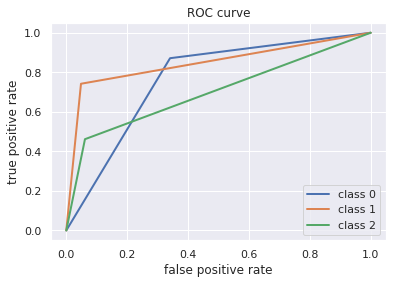

In [107]:
fpr = dict()
tpr = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i],y_pred[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

# Najlepszy

In [108]:
y_pred=knn_s3_2.predict(X_test)
confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1))

array([[121,   7,   4],
       [  3,  28,   0],
       [  4,   0,   9]])

In [109]:
precision_score(y_test,y_pred,average='macro')

0.8125400641025641

In [110]:
recall_score(y_test,y_pred,average='macro')

0.8374000551419906

In [111]:
f1_score(y_test,y_pred,average='micro')

0.8977272727272727

In [112]:
geometric_mean_score(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1),average='macro')

0.8790148889936137

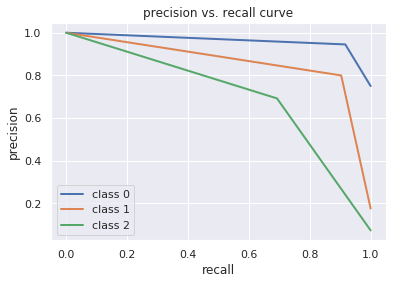

In [113]:
n_classes=3
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],y_pred[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

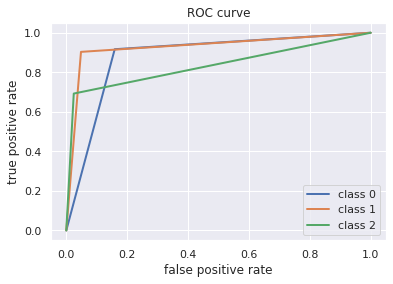

In [114]:
# roc curve
fpr = dict()
tpr = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i],y_pred[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

Można zaaobserwować wyraźną zmainę w wachowaniu k-NN w zależności od wielkości k. Małe k powoduje że obszary decyzyjne są bardzo poszarpane, wskazuje to że k-NN mocno raguje na odmienne jednostki w grupie, podczas gdzy dla większych wartości obszary decyzyjne są głasze. Gdybym miał skorzystać z k-NN'a mając mało danych , ustawił bym k na jakąś małą wartość, aby nie zgubić szczegółow gdzie i tak już mam mało danych.